In [2]:
import numpy as np
import matplotlib.pyplot as plt


**Fourier Transform of DC signal**


F{A} <------> A dirac_delta(f)

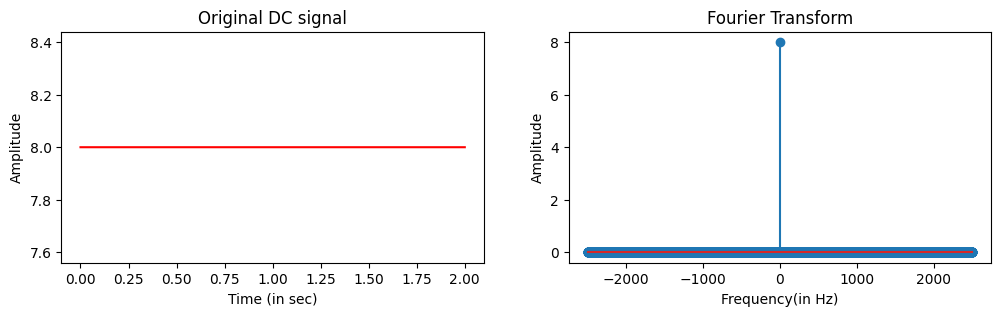

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
A = 8          # DC value
sr = 5000      # Sampling rate
dur = 2        # Duration in seconds

# Generate time vector
t = np.linspace(0, dur, sr * dur)

# Create a DC signal with constant amplitude 'A'
DC_signal = [A] * len(t)

# Perform Discrete Fourier Transform (DFT)
dft_DC_signal = np.fft.fftshift(np.fft.fft(DC_signal))

# Generate frequency axis for the plot
freq = np.fft.fftshift(np.fft.fftfreq(len(dft_DC_signal), t[1] - t[0]))

# Plot the original DC signal
plt.figure(figsize=[12, 3])
plt.subplot(1, 2, 1)
plt.title("Original DC signal")
plt.xlabel("Time (in sec)")
plt.ylabel("Amplitude")
plt.plot(t, DC_signal, color='red')

# Plot the Fourier transform
plt.subplot(1, 2, 2)
plt.title("Fourier Transform")
plt.xlabel("Frequency(in Hz)")
plt.ylabel("Amplitude")
plt.stem(freq, abs(dft_DC_signal) / (sr * dur))

# Display the plots
plt.show()


**FT of Impulse signal**

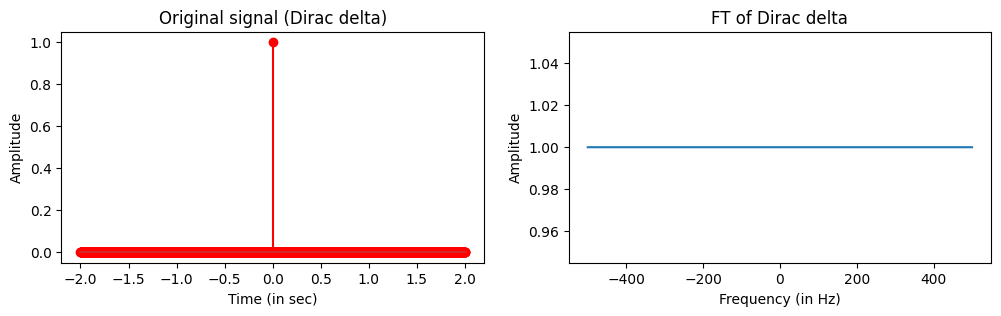

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dur = 2         # Duration in seconds
sr = 1000       # Sampling rate in Hz
A = 1           # Amplitude of Dirac delta

# Time vector
t = np.linspace(-1 * dur, dur, sr * dur * 2)

# Create Dirac delta function
dirac_delta = np.zeros_like(t)
dirac_delta[len(dirac_delta)//2] = A  # Set the value at the middle index to the amplitude A

# Compute the Fourier transform of the Dirac delta
dft_dirac_delta = np.fft.fftshift(np.fft.fft(dirac_delta))
freq = np.fft.fftshift(np.fft.fftfreq(len(dirac_delta), 1/sr))

# Plot the original signal (Dirac delta) in the time domain
plt.figure(figsize=[12, 3])
plt.subplot(1, 2, 1)
plt.title("Original signal (Dirac delta)")
plt.ylabel("Amplitude")
plt.xlabel("Time (in sec)")
plt.stem(t, dirac_delta,linefmt="r-",markerfmt="r")

# Plot the Fourier transform of the Dirac delta in the frequency domain
plt.subplot(1, 2, 2)
plt.title("FT of Dirac delta")
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Amplitude")
plt.plot(freq, abs(dft_dirac_delta))
plt.show()
